### Multiple Parallel Input and Multi-step output

In [2]:
# multivariate output stacked lstm example
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence

# Read the data
data = read_csv('pollution2.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
print(f'The shape of the raw_data before scaling is {raw_data.shape}')
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)

n_train = 40000
#dataset = raw_data[0:n_train,:]
dataset = scaled_data[0:n_train,:]
# choose a number of time steps
n_steps_in, n_steps_out = 30, 20
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(30, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')
# fit model
train_history = model.fit(X, y, epochs=50, verbose=0, shuffle=False)

# demonstrate Direct prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps_in,:]
print(f'Initial shape of x_input {x_inp.shape}')
x_input = x_inp.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(f'The shape of yhat after prediction is {yhat.shape}')
yhat = yhat.reshape(n_steps_out, n_features)
print(f'The new shape of yhat  is {yhat.shape}')
inv_yhat = scaler.inverse_transform(yhat)
print(inv_yhat)

print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
# plt.plot(train_history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The shape of the raw_data before scaling is (43800, 5)


NameError: name 'RepeatVector' is not defined

Initial shape of x_input (30, 5)
The shape of yhat after prediction is (1, 30, 5)
The new shape of yhat  is (30, 5)
[[ 2.03360199e+02 -2.12218142e+00  6.99545860e+00  1.02034277e+03
  -3.80703616e+00]
 [ 2.04589645e+02 -2.39610720e+00  6.17653608e+00  1.02027490e+03
  -8.21857274e-01]
 [ 2.06114624e+02 -2.29113960e+00  5.92675781e+00  1.02091705e+03
   4.50642967e+00]
 [ 2.03963364e+02 -2.49099874e+00  5.30986118e+00  1.02066052e+03
   8.90179348e+00]
 [ 1.99204239e+02 -2.34223318e+00  4.65976906e+00  1.02073450e+03
   1.26936235e+01]
 [ 1.92410355e+02 -1.85328960e+00  4.00958586e+00  1.02112012e+03
   1.53310061e+01]
 [ 1.83563736e+02 -1.32102633e+00  3.50959730e+00  1.02177277e+03
   1.70166454e+01]
 [ 1.73039658e+02 -1.06122565e+00  3.13659573e+00  1.02238257e+03
   1.84433823e+01]
 [ 1.61007202e+02 -1.16794014e+00  2.88226914e+00  1.02280627e+03
   1.98561802e+01]
 [ 1.47954819e+02 -1.59473729e+00  2.75705314e+00  1.02306171e+03
   2.14259357e+01]
 [ 1.34515198e+02 -2.24762130e+00 

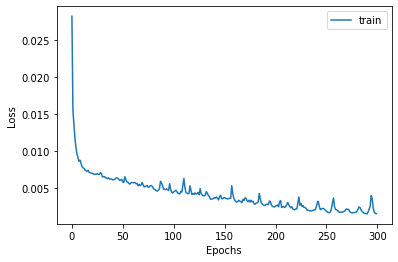

In [57]:
# demonstrate Direct prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
lag = 0
x_inp = scaled_data[n_train+lag:n_train+n_steps_in+lag,:]
print(f'Initial shape of x_input {x_inp.shape}')
x_input = x_inp.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(f'The shape of yhat after prediction is {yhat.shape}')
yhat = yhat.reshape(n_steps_out, n_features)
print(f'The new shape of yhat  is {yhat.shape}')
inv_yhat = scaler.inverse_transform(yhat)
print(inv_yhat)

print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
# plt.plot(train_history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

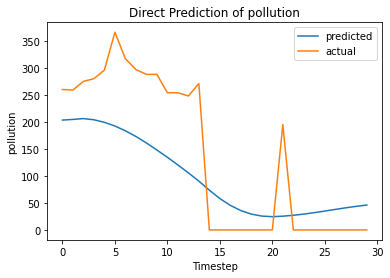

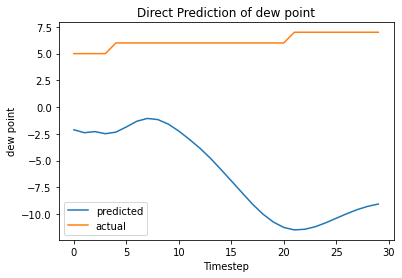

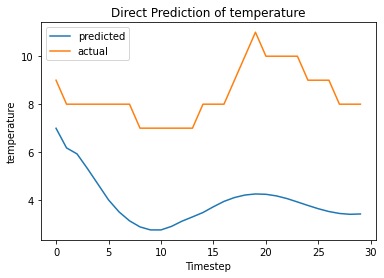

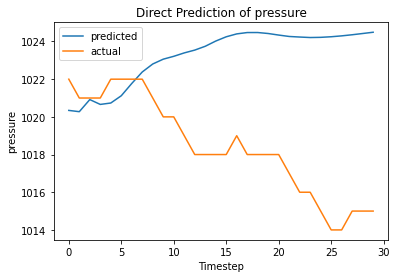

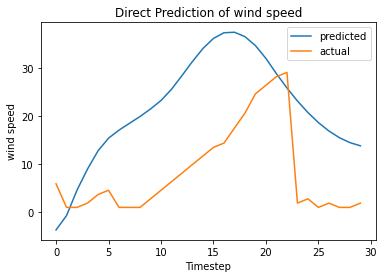

In [58]:
attr = ["pollution", "dew point", "temperature", "pressure", "wind speed"]
for i in range(5):
    title = "Direct Prediction of "+str(attr[i])
    actual = raw_data[2080:2110,i]
    pred = inv_yhat.T
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(pred[i], label="predicted")
    plt.plot(actual, label="actual")
    plt.legend()
    plt.show()

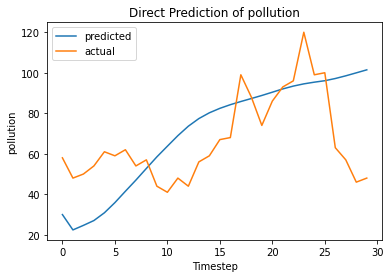

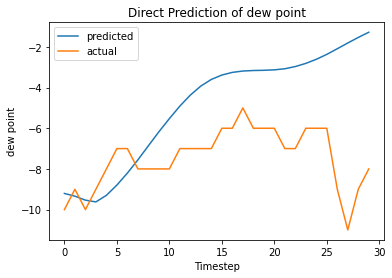

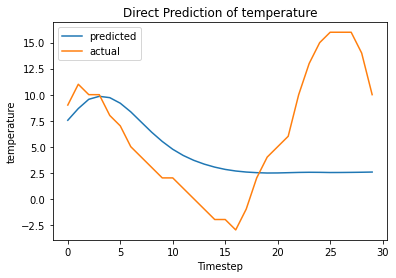

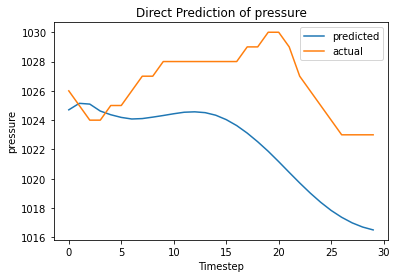

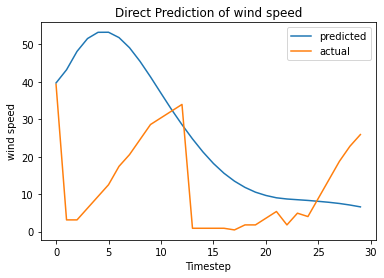

In [56]:
attr = ["pollution", "dew point", "temperature", "pressure", "wind speed"]
for i in range(5):
    title = "Direct Prediction of "+str(attr[i])
    actual = raw_data[2030:2060,i]
    pred = inv_yhat.T
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
    plt.plot(pred[i], label="predicted")
    plt.plot(actual, label="actual")
    plt.legend()
    plt.show()